In [33]:
import sys
oldsysstdout = sys.stdout

from matplotlib import pyplot as plt
%matplotlib inline
from anuga.file import netcdf

sys.stdout = oldsysstdout

import pandas as pd
from scipy.interpolate import griddata
import numpy as np

import matplotlib.tri as tri

def plot_sww(swwFile, plot_type, save_figs = True, return_val = False, plot = True):


    fid = netcdf.NetCDFFile(swwFile)

    x = fid.variables['x'][:]
    y = fid.variables['y'][:]
    elev = fid.variables['elevation'][:]
    stage = fid.variables['stage'][:]

    if plot_type == 'stage':
        plotter = stage
    elif plot_type == 'depth':
        plotter = stage - elev
    elif plot_type == 'elev':
        assert len(elev.shape) == 2
        plotter = elev
    elif plot_type == 'diff':
        assert len(elev.shape) == 2
        plotter = elev - elev[0]
    elif plot_type == 'xvel':
        try:
            xmom = fid.variables['xmomentum'][:]
            plotter = xmom / (stage - elev + 0.000001)
        except:
            print "Didn't save xmomentum."
    elif plot_type == 'yvel':
        try:
            ymom = fid.variables['ymomentum'][:]
            plotter = ymom / (stage - elev + 0.000001)
        except:
            print "Didn't save ymomentum."
    elif plot_type == 'conc':
        try:
            conc = fid.variables['concentration'][:]
            plotter = conc
        except:
            print "Didn't save concentration."

    fid.close()


    if plot:
        
        triang = tri.Triangulation(x, y)
        for i in range(1,len(plotter),5):

            plt.figure(figsize=(16,2))
            plt.tripcolor(triang, plotter[i], shading='gouraud', cmap='jet')
#             plt.clim([plotter.min(), plotter.max()])
            plt.colorbar()
            plt.show()

        
    if return_val == True:
        
        return x, y, elev, plotter
    

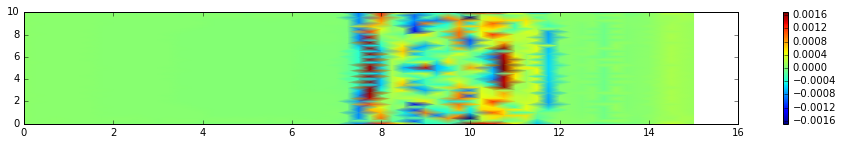

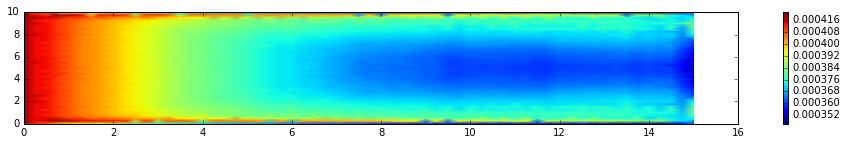

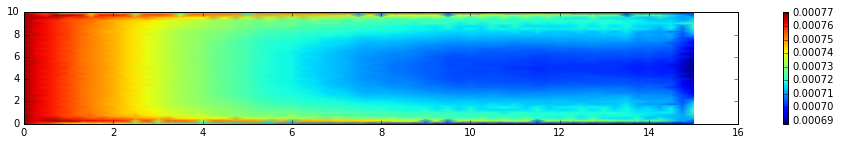

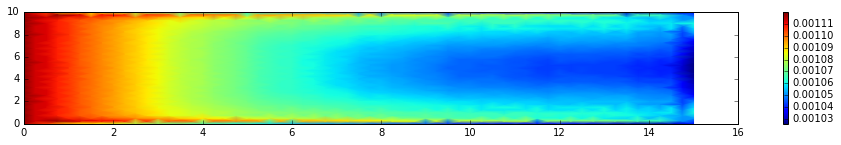

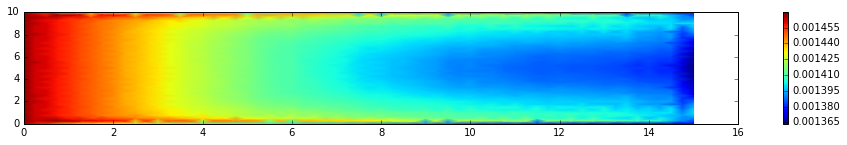

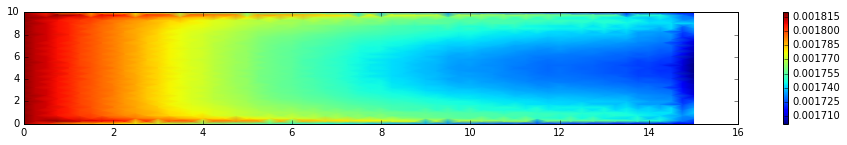

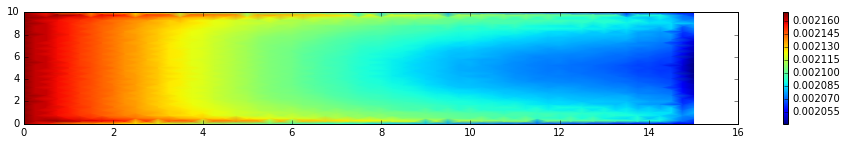

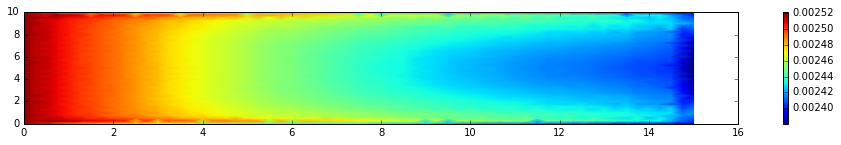

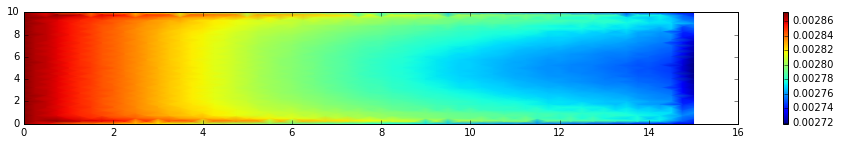

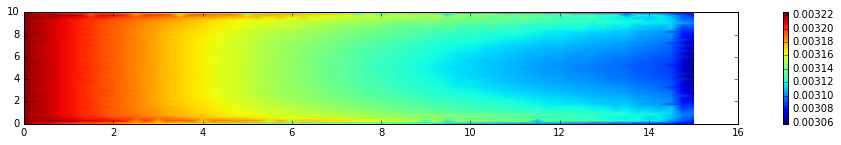

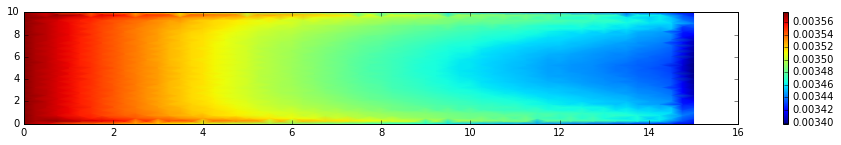

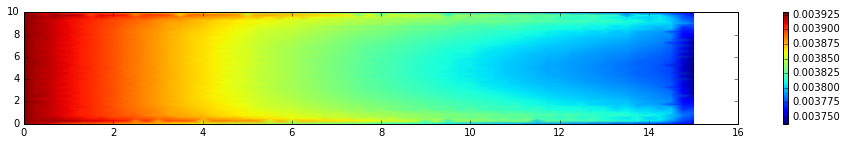

In [34]:
x, y, elev, val = plot_sww('plane3.sww', 'diff', return_val = True, plot = True)

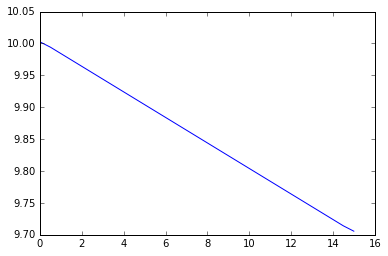

In [37]:
plt.plot(x[y == 5],elev[-1][y == 5])

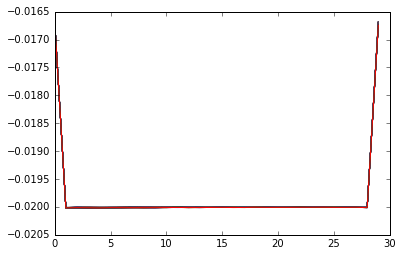

In [43]:
for i in range(2,len(elev)):

    sl = np.diff(elev[i][y == 5])/np.diff(x[y ==5])
    
    plt.plot(sl)

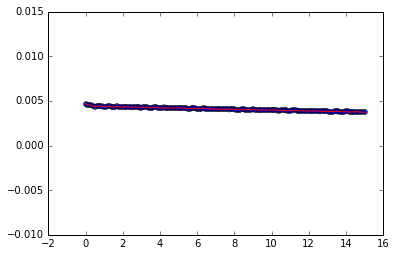

In [113]:
import scipy.interpolate as sp


xx = np.hstack((np.linspace(0.000001,4,30), np.linspace(4.1,15,30)))

for i in [-1]:

    fl = sp.interp1d(x, val[i], kind='linear')
    # fc = sp.interp1d(x, val[i], kind='cubic')

    plt.scatter(x, val[i], alpha = 0.1, hold=True)
    plt.plot(xx, fl(xx), 'r')
#     plt.ylim([0.0005,0.0035])
    plt.show()

In [81]:
val[-1]

array([ 0.00306672,  0.00306563,  0.00306546, ...,  0.00089106,
        0.00089083,  0.00088813], dtype=float32)

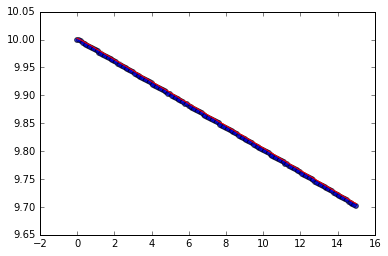

In [74]:
import scipy.interpolate as sp


xx = np.linspace(0.00001,15,60)

fl = sp.interp1d(x, val[-1], kind='linear')
# fc = sp.interp1d(x, val[i], kind='cubic')

plt.scatter(x, val[i], alpha = 0.1, hold=True)
plt.plot(xx, fl(xx), 'r')
#     plt.ylim([0.0005,0.0035])
plt.show()

15.0